In [1]:
import numpy as np
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import copy
#import pylab as pyl
from pprint import pprint
%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
alldata = fits.open('SDSS_HSC.fits')

In [3]:
# col 1 seems to have data I'm looking ofr
# not sure that's in col 0 -- ignore it

# codes:
# L = logical (boolean)
# K = 64 bit integer
# D = double precision floating point

print alldata[1].columns

ColDefs(
    name = 'id'; format = 'K'
    name = 'id_isnull'; format = 'L'
    name = 'ra2000'; format = 'D'
    name = 'ra2000_isnull'; format = 'L'
    name = 'decl2000'; format = 'D'
    name = 'decl2000_isnull'; format = 'L'
    name = 'gmag_psf'; format = 'D'
    name = 'gmag_psf_isnull'; format = 'L'
    name = 'rmag_psf'; format = 'D'
    name = 'rmag_psf_isnull'; format = 'L'
    name = 'imag_psf'; format = 'D'
    name = 'imag_psf_isnull'; format = 'L'
    name = 'zmag_psf'; format = 'D'
    name = 'zmag_psf_isnull'; format = 'L'
    name = 'ymag_psf'; format = 'D'
    name = 'ymag_psf_isnull'; format = 'L'
    name = 'gmag_psf_err'; format = 'D'
    name = 'gmag_psf_err_isnull'; format = 'L'
    name = 'rmag_psf_err'; format = 'D'
    name = 'rmag_psf_err_isnull'; format = 'L'
    name = 'imag_psf_err'; format = 'D'
    name = 'imag_psf_err_isnull'; format = 'L'
    name = 'zmag_psf_err'; format = 'D'
    name = 'zmag_psf_err_isnull'; format = 'L'
    name = 'ymag_psf_err'; 

In [4]:
cols = alldata[1].columns

In [5]:
# since these are like numpy arrays, can use numpy-like slicing and such

In [6]:
def galaxy_mag(Mc, Mp):
    # 0 magnitude meaningless in this case. ignore them
    if Mc == 0 or Mp == 0:
        return
    # where Mc is the complete model magnitude and  Mp is the quasar PSF magnitude
    return -2.5*np.log10((10**(-Mc/2.5)) - 10**(-Mp/2.5))


# on the graphs, zoom in between magnitudes 0-25 and redshift 0-1, maybe 1.5

In [7]:
quasars = alldata[1].data   # need .data here, otherwise won't be able to access rows/columns

In [8]:
# defining the cmodels and psf lists for each band
rmagP = copy.copy(quasars['rmag_psf'])
rmagC = copy.copy(quasars['rmag_cmodel'])
gmagP = copy.copy(quasars['gmag_psf'])
gmagC = copy.copy(quasars['gmag_cmodel'])
imagP = copy.copy(quasars['imag_psf'])
imagC = copy.copy(quasars['imag_cmodel'])
zmagP = copy.copy(quasars['zmag_psf'])
zmagC = copy.copy(quasars['zmag_cmodel'])
ymagP = copy.copy(quasars['ymag_psf'])
ymagC = copy.copy(quasars['ymag_cmodel'])


for i in range(len(rmagP)):
    if rmagP[i] ==0 or rmagP[i] > 25:
        rmagP[i] = float(np.nan)
    if rmagC[i] ==0:
        rmagC[i] = float(np.nan)
for i in range(len(imagP)):
    if imagP[i] ==0 or imagP[i] > 25:
        imagP[i] = float(np.nan)
    if imagC[i] ==0:
        imagC[i] = float(np.nan)

for i in range(len(gmagP)):
    if gmagP[i] ==0 or gmagP[i] > 25:
        gmagP[i] = float(np.nan)
    if gmagC[i] ==0:
        gmagC[i] = float(np.nan)

for i in range(len(zmagP)):
    if zmagP[i] ==0 or zmagP[i] > 25:
        zmagP[i] = float(np.nan)
    if zmagC[i] ==0:
        zmagC[i] = float(np.nan)

for i in range(len(ymagP)):
    if ymagP[i] ==0 or ymagP[i] > 25:
        ymagP[i] = float(np.nan)
    if ymagC[i] ==0:
        ymagC[i] = float(np.nan)


# creating empty lists to hold galaxy magnitudes for each band
galaxy_magR = np.zeros(len(quasars['rmag_psf']))
galaxy_magG = np.zeros(len(quasars['gmag_psf']))
galaxy_magI = np.zeros(len(quasars['imag_psf']))
galaxy_magZ = np.zeros(len(quasars['zmag_psf']))
galaxy_magY = np.zeros(len(quasars['ymag_psf']))

# redshift

Z = quasars['Z']

# location
checkRA = quasars['RA']
checkDEC = quasars['DEC']


#print rmagP
#print rmagC
#print gmagP
#print imagP
#print zmagP
#print ymagP

In [9]:
print len(quasars['gmag_psf'])

7091


[ 23.11820757          nan          nan ...,          nan          nan
          nan]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10
//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


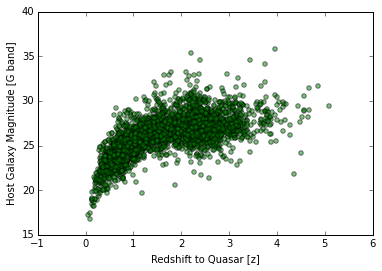

In [10]:
i = 0
galmag = 0
for i in range(len(gmagP)):
    galmag = galaxy_mag(gmagC[i], gmagP[i])
    galaxy_magG[i] = galmag
    
print galaxy_magG

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magG, alpha = .5, c = 'green')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [G band]')


fig.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


1324 1.04698550701
5880 1.185


34.8384883903
-4.72085329707


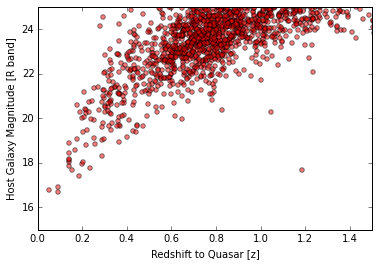

In [11]:
i = 0
galmag = 0
for i in range(len(rmagP)):
    galmag = galaxy_mag(rmagC[i], rmagP[i])
    galaxy_magR[i] = galmag
    
#print galaxy_magR


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magR, alpha = .5, c = 'red')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [R band]')
ax.set_xlim(xmax = 1.5, xmin = 0)
ax.set_ylim(ymax = 25)
fig.show()




for i in range(len(rmagP)):
    if galaxy_magR[i] < 21 and 1.0 < Z[i] < 1.2:
        print i, Z[i]

print
print
# named 2brightR
print checkRA[1342]
print checkDEC[1342]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


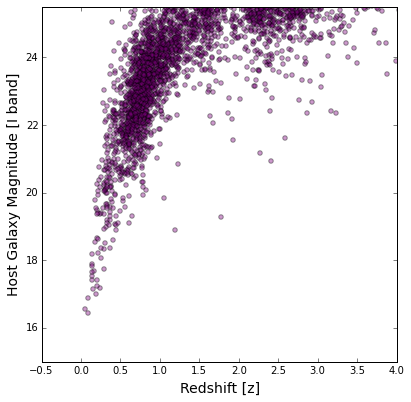

In [110]:
i = 0
galmag = 0
for i in range(len(imagP)):
    galmag = galaxy_mag(imagC[i], imagP[i])
    galaxy_magI[i] = galmag
    
#print galaxy_magI


fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(14)
ax = fig.add_subplot(221)
ax.scatter(Z, galaxy_magI, alpha = .4, c = 'purple')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [I band]')
ax.set_xlim(xmax = 4, xmin = -.5)
ax.set_ylim(ymin = 15, ymax = 25.5)
plt.ylabel('Host Galaxy Magnitude [I band]', fontsize=14)
plt.xlabel('Redshift [z]', fontsize=14)



#i = 0
#galmag = 0
#galaxy_magI1 = []
#for i in range(len(imagP)):
#    galmag = galaxy_mag(imagC[i], imagP[i])
#    if galmag - imagC[i] < 5:   # 2.5 = 10%, 5 = 1%
#        galaxy_magI1.append(galmag)
#    else:
#        galaxy_magI1.append(np.nan)
    
#print galaxy_magI1


#ax2 = fig.add_subplot(222)
#ax2.scatter(Z, galaxy_magI1, alpha = .5, c = 'purple')
#ax2.set_xlabel('Redshift to Quasar [z]')
#ax2.set_ylabel('Host Galaxy Magnitude [I band], >10%')




#for i in range(len(galaxy_magI1)):
#    if galaxy_magI1[i] < 26 and Z[i] > 3 and Z[i] < 5:
#        print i, Z[i]
        
#print
#print



#print checkRA[954], checkDEC[954]


# 378, 3351, 2081, 133, 2222, 3312, 3357, 5260, 868, 2050, 4623 (next to a huge star)

#101

# email
# 2222     37.2751988988 -5.2413844274
# 

In [13]:



# superposed1 36.7401630476 -3.55984494584 -> index 2050 
# possibly -> 30.6297849156 -4.37967919447 -> index 101
# heavily disrupted, near another galaxy    140.384480776 -0.743835162247 index 3814
# disrupted, something smaller on the left  332.548426023 -0.281937912527 index 5776
# 2 galaxies close together  36.8321994234 -3.97225452121  index 2081
# 2 cores in one galaxy 246.875075758 43.6806912351  index 5498
# somewhat odd shape 37.2751988988 -5.2413844274   index 222
# several close galaxies   34.7803594674 -3.74295825827  index 1324
# 2 different colors in galaxy  335.598004653 1.59330466033 index 6148







# checked ->  (10% or more!)
# 3449 (Z = 4.5), 
# 2222** (Z = 3.1737)  37.2751988988, -5.2413844274
# 2081** (Z = 2.262) 2 close galaxies 36.8321994234, -3.97225452121
# 891 (Z = 2.015) 33.4625224729, -3.96669539263
# 1023 (Z = 2.379) disrupted  33.9282841448 -6.04205479713
# 3535 (Z = 2.7589) 137.661574873 2.93454143112
# 3814  (Z = 2.248)   140.384480776 -0.743835162247
# 4210 (Z =  2.193)   178.29910423 1.49101012378
# 5776**  (Z = 2.503) 332.548426023 -0.281937912527 
# 6208 (Z  = 2.427)   336.159968647 1.43237147557
# 1324** (Z = 1.047)  34.7803594674 -3.74295825827  (several close galaxies)
# 2799 (Z = 1.7703)  129.716891826 2.95101473157  disrupted
# 5880 (Z = 1.185)   333.408263398 -0.718314627891  that one bright one
# 138 (Z = 1.0495)   30.7792347637 -4.28041766248
# 475 (Z = 1.1257)   31.8867896841 -4.65445664735  possible extended object
# 660 (Z = 1.000997)   32.650341343 -5.01596076005
# 692 (Z = 1.078233)    32.7725338533 -5.24001994189
# 1047 (Z = 1.036)   33.9914235617 -3.85261517577
# 1239 (Z = 1.095)   34.5395036657 -4.99605927142   something fuzzy on the side
# 1285 (Z = 1.0968)   34.6596049633 -4.95015592907
# 1481 (Z = 1.0767)   35.1918361187 -3.03696193566    slight disruption
# 1573 (Z = 1.029)  35.4364765941 -3.52746677655    possible extended object
# 1901 (Z = 1.06)  36.2772391399 -5.149068107
# 1973 (Z = 1.01)   36.4837655961 -4.79015222005
# 3252**  (Z = 1.026)  134.393318159 2.80817910469   disrupted, possible merger
# 3441  (Z = 1.673)  136.571940907 -0.673747215384
# 5676 (Z = 1.019)   331.639611606 1.37730348475    bright object
# 6148** (Z = 1.0094)   335.598004653 1.59330466033    2 different colors in this galaxy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


[ 22.76911278  27.81742803          nan ...,          nan  27.11933311
          nan]


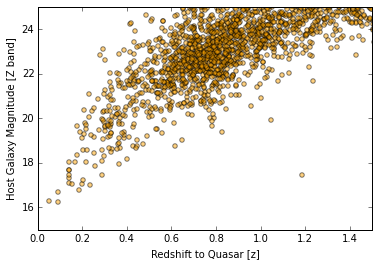

In [14]:
i = 0
galmag = 0
for i in range(len(zmagP)):
    galmag = galaxy_mag(zmagC[i], zmagP[i])
    galaxy_magZ[i] = galmag
    
print galaxy_magZ


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magZ, alpha = .5, c = 'orange')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [Z band]')
ax.set_xlim(xmax = 1.5, xmin = 0)
ax.set_ylim(ymax = 25)
fig.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


545 0.0919840410352
2055 0.0532368868589
333.408263398
-0.718314627891
17.6594639591
32.1694365965
-6.4546631787
36.7532323573
-4.33906958464


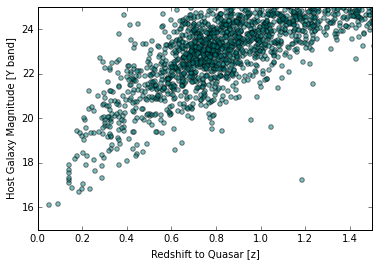

In [15]:
i = 0
galmag = 0
for i in range(len(ymagP)):
    galmag = galaxy_mag(ymagC[i], ymagP[i])
    galaxy_magY[i] = galmag
    
#print galaxy_magY


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z, galaxy_magY, alpha = .5, c = 'teal')
ax.set_xlabel('Redshift to Quasar [z]')
ax.set_ylabel('Host Galaxy Magnitude [Y band]')
ax.set_xlim(xmax = 1.5, xmin = 0)
ax.set_ylim(ymax = 25)
fig.show()

for i in range(len(ymagP)):
    if galaxy_magY[i] < 16.5 and Z[i] < .2:
        print i, Z[i]
        
print checkRA[5880]   # that one really far outlier
print checkDEC[5880]
print ymagP[5880]



# probably extended objects
print checkRA[545]
print checkDEC[545]



print checkRA[2055]
print checkDEC[2055]

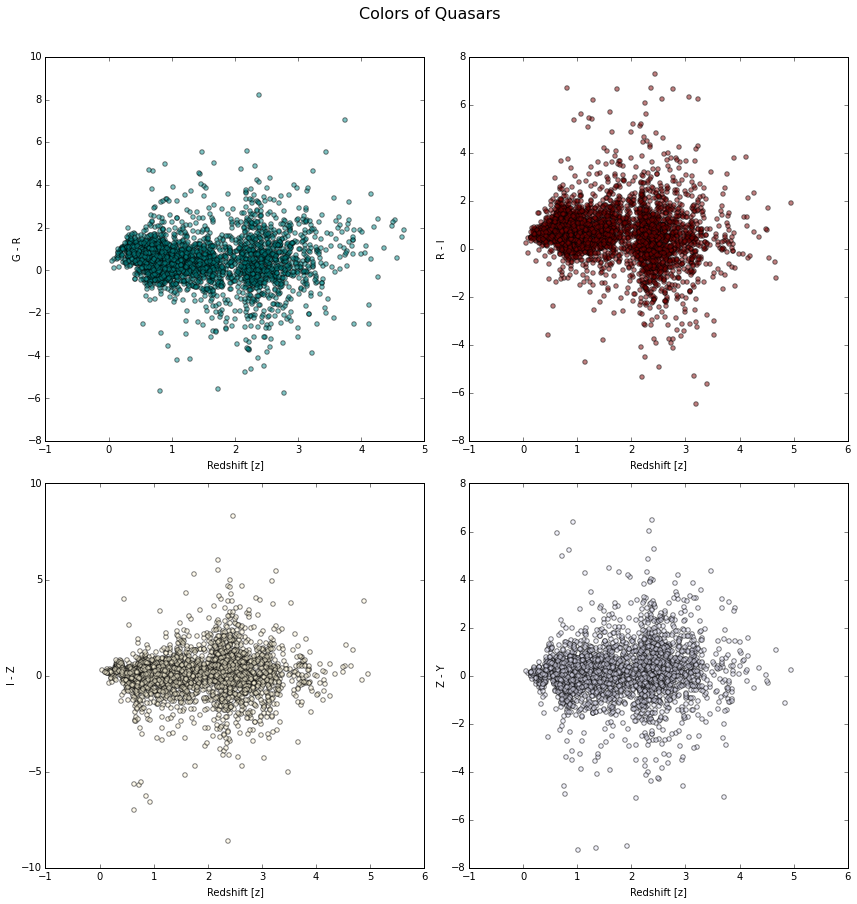

In [16]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)
fig.suptitle("Colors of Quasars", fontsize = 16, y = 1.04)

galaxy_magGR = np.zeros(len(galaxy_magG))
galaxy_magRI = np.zeros(len(galaxy_magR))
galaxy_magIZ = np.zeros(len(galaxy_magI))
galaxy_magZY = np.zeros(len(galaxy_magZ))






for i in range(len(galaxy_magG)):
    if galaxy_magG[i] > 25 or galaxy_magR[i] > 25:
        galaxy_magGR[i] = float('nan')
    galaxy_magGR[i] = galaxy_magG[i] - galaxy_magR[i]
    
    #####
    
for i in range(len(galaxy_magRI)):
    if galaxy_magR[i] > 25 or galaxy_magI[i] > 25:
        galaxy_magRI[i] = float('nan')
    galaxy_magRI[i] = galaxy_magR[i] - galaxy_magI[i]
    
    ######
    
for i in range(len(galaxy_magIZ)):
    if galaxy_magI[i] > 25 or galaxy_magZ[i] > 25:
        galaxy_magIZ[i] = float('nan')
    galaxy_magIZ[i] = galaxy_magI[i] - galaxy_magZ[i]
    
    ######

for i in range(len(galaxy_magZY)):
    if galaxy_magZ[i] > 25 or galaxy_magY[i] > 25:
        galaxy_magZY[i] = float('nan')
    galaxy_magZY[i] = galaxy_magZ[i] - galaxy_magY[i]
    
    #######

ax1 = plt.subplot(221, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'G - R') #xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magGR, c = 'darkcyan', alpha = .5)

ax2 = plt.subplot(222, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'R - I')
plt.scatter(Z, galaxy_magRI, c = 'maroon', alpha = .5)

ax3 = plt.subplot(223, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'I - Z')
plt.scatter(Z, galaxy_magIZ, c = 'cornsilk', alpha = .5)

ax2 = plt.subplot(224, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'Z - Y')
plt.scatter(Z, galaxy_magZY, c = 'lavender', alpha = .5)

fig.tight_layout()
plt.draw()
plt.show()


# now around 3400-3800 galaxies

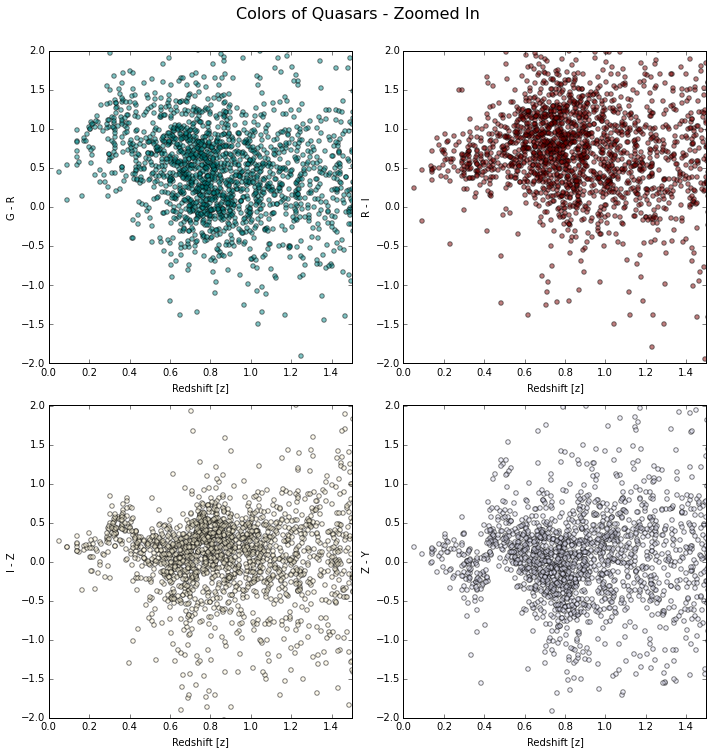

In [17]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Colors of Quasars - Zoomed In", fontsize = 16, y = 1.04)

ax1 = plt.subplot(221, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'G - R', xlim =[-10, 10], ylim=[-10,10])
plt.scatter(Z, galaxy_magGR, c = 'darkcyan', alpha = .5)
ax1.set_ylim([-2, 2])
ax1.set_xlim([0,1.5])

ax2 = plt.subplot(222, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'R - I', xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magRI, c = 'maroon', alpha = .5)
ax2.set_ylim([-2, 2])
ax2.set_xlim([0,1.5])

ax3 = plt.subplot(223, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'I - Z', xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magIZ, c = 'cornsilk', alpha = .5)
ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])

ax4 = plt.subplot(224, autoscale_on=True, xlabel = 'Redshift [z]', ylabel = 'Z - Y', xlim=[-10,10], ylim=[-10,10])
plt.scatter(Z, galaxy_magZY, c = 'lavender', alpha = .5)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

fig.tight_layout()
plt.draw()
plt.show()


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 1.5)

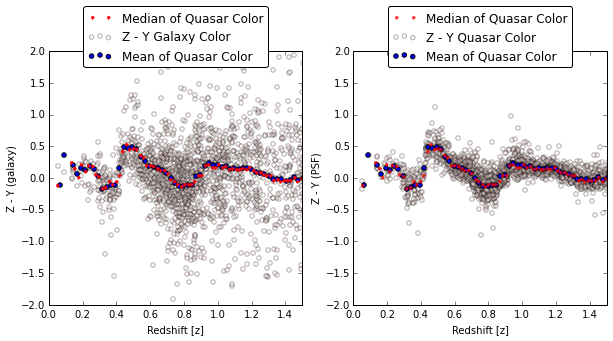

In [18]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)




x = Z
y = zmagP - ymagP

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
nbins = 200

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
mean = sy / n


total_bins = 75


ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'Z - Y (PSF)')
plt.scatter(Z, zmagP - ymagP, c = 'mistyrose', alpha = .3, label = 'Z - Y Quasar Color')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(Z,bins)
running_medianZY = [np.median((zmagP - ymagP)[idx==k]) for k in range(total_bins)]
plt.plot(bins-delta/2,running_medianZY,'r.',lw=5,alpha=.8, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')
plt.scatter(Z, galaxy_magZ - galaxy_magY, c = 'mistyrose', alpha = .3, label = 'Z - Y Galaxy Color')

plt.plot(bins-delta/2,running_medianZY,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide


(0, 1.5)

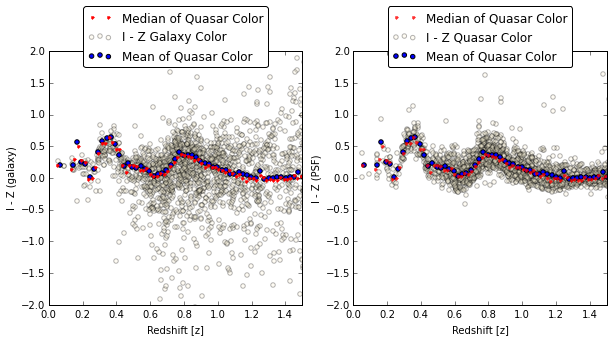

In [19]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)






x = Z
y = imagP - zmagP

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
nbins = 200

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
mean = sy / n






ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'I - Z (PSF)')
plt.scatter(Z, imagP - zmagP, c = 'cornsilk', alpha = .3, label = 'I - Z Quasar Color')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])





bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(Z,bins)
running_medianIZ = [np.median((imagP - zmagP)[idx==k]) for k in range(total_bins)]
plt.plot(bins-delta/2,running_medianIZ,'r.',lw=5,alpha=.8, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'I - Z (galaxy)')
plt.scatter(Z, galaxy_magI - galaxy_magZ, c = 'cornsilk', alpha = .3, label = 'I - Z Galaxy Color')

plt.plot(bins-delta/2,running_medianIZ,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


(0, 1.5)

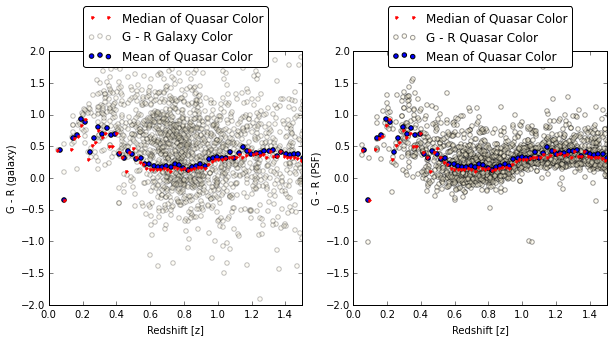

In [20]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)



x = Z
y = gmagP - rmagP

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
nbins = 200

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
mean = sy / n






ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'G - R (PSF)')
plt.scatter(Z, gmagP - rmagP, c = 'cornsilk', alpha = .4, label = 'G - R Quasar Color')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(Z,bins)
running_medianGR = [np.median((gmagP - rmagP)[idx==k]) for k in range(total_bins)]
plt.plot(bins-delta/2,running_medianGR,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)







ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'G - R (galaxy)')
plt.scatter(Z, galaxy_magG - galaxy_magR,  c = 'cornsilk', alpha = .25, label = 'G - R Galaxy Color')

plt.plot(bins-delta/2,running_medianGR,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


(0, 1.5)

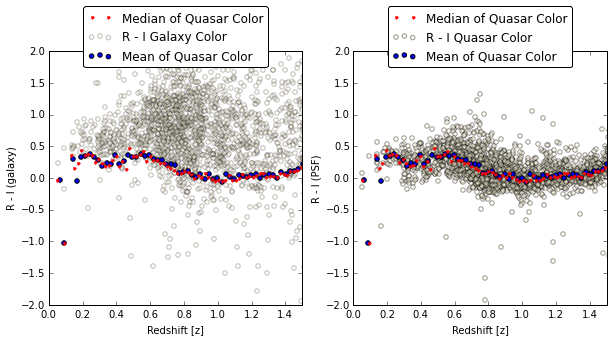

In [21]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)



x = Z
y = rmagP - imagP

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
nbins = 200

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
mean = sy / n






ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = 'R - I (PSF)')
plt.scatter(Z, rmagP - imagP, c = 'cornsilk', alpha = .4, label = 'R - I Quasar Color')
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(Z,bins)
running_medianRI = [np.median((rmagP - imagP)[idx==k]) for k in range(total_bins)]
plt.plot(bins-delta/2,running_medianRI,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)







ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'R - I (galaxy)')
plt.scatter(Z, galaxy_magR - galaxy_magI,  c = 'cornsilk', alpha = .25, label = 'R - I Galaxy Color')

plt.plot(bins-delta/2,running_medianRI,'r.',lw=5,alpha=1.0, label = 'Median of Quasar Color')
plt.scatter((_[1:] + _[:-1])/2, mean, c= 'b', alpha = 1.0, label = 'Mean of Quasar Color')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])

In [232]:
#L = zip(Z, galaxy_magZY)
#L = sorted(L)
#L = L[~np.isnan(L)]
#new_Z, new_magzy = zip(*L)
# now they are sorted. need bins of width .02
#print(new_Z[1], new_magzy[1])
# (0.05564257875084877, nan)   ---> before removing nan
#print(new_Z[3], new_magzy[3])
# (0.091984041035175323, 0.097266465020197757) --> next non-nan pair